# MNIST Dataset

The MNIST dataset consists of 70,000 28x28 black-and-white images of handwritten digits extracted from two NIST databases. There are 60,000 images in the training dataset and 10,000 images in the validation dataset, one class per digit so a total of 10 classes, with 7,000 images (6,000 train images and 1,000 test images) per class. 

Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets). All the images in the test set were drawn by different individuals than the images in the training set.

The digits have a standardized size and are centered on a fixed-size image.

http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import struct     #This module performs conversions between Python values and C structs represented as Python bytes objects. 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

1. Open the files

Using the files directly downloaded from the link

In [2]:
#10k test images
with open('t10k-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    testdata = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    testdata = testdata.reshape((size, nrows, ncols))

In [3]:
#10k test labels
with open('t10k-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    testlabels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    testlabels = testlabels.reshape((size,)) # (Optional)
print(testlabels)

[7 2 1 ... 4 5 6]


In [4]:
#60k training images
with open('train-images.idx3-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    nrows, ncols = struct.unpack(">II", f.read(8))
    traindata = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    traindata = traindata.reshape((size, nrows, ncols))

In [5]:
#60k training labels
with open('train-labels.idx1-ubyte','rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    trainlabels = np.fromfile(f, dtype=np.dtype(np.uint8).newbyteorder('>'))
    trainlabels = trainlabels.reshape((size,)) # (Optional)
print(trainlabels)

[5 0 4 ... 5 6 8]


We can use tensorflow and datasets from sklearn.

In [6]:
# import tensorflow as tf
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

In [7]:
# from sklearn import datasets
# digits = datasets.load_digits()
# X, y = digits.data, digits.target

2. Graph some digits

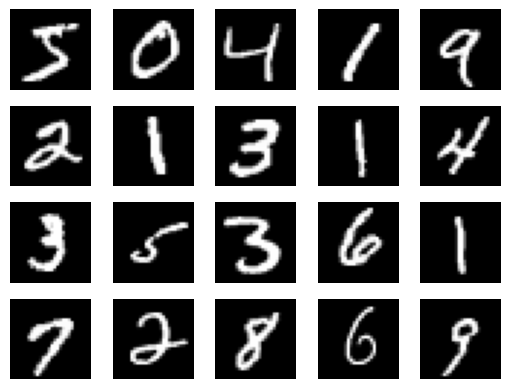

In [8]:
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(traindata[i],cmap='gray')
    plt.axis('off')
plt.show()

We can see that each digit appears multiple times in different patterns. Also the appearence of each digit is not in sequence.

3. Train data in a matrix

We need to reshape the image dataset into an n by m matrix: n images of m samples where each sample is a pixel value.


In [9]:
testdata = testdata.reshape(10000,784)             
traindata = traindata.reshape(60000,784)

In [10]:
traindata.shape

(60000, 784)

# PCA

4. Standarize the data

According to the theory it is important normalize or standarize the data before PCA because PCA seeks to maximize the variance of each component.

In [11]:
traindf=pd.DataFrame(traindata)                #define a dataframe from the matrix

In [12]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 44.9 MB


In [13]:
traindf.isna().sum()                   #checking thre isn't missing values in the dataframe

0      0
1      0
2      0
3      0
4      0
      ..
779    0
780    0
781    0
782    0
783    0
Length: 784, dtype: int64

In [14]:
train_norm = (traindf-traindf.mean(axis=0))/traindf.std(axis=0)  
train_norm
#try to standardize with the formula but got an output full of nan values

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
59996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
59997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN
59998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.033171,-0.022463,-0.016069,-0.011432,-0.009007,-0.00577,NaN,NaN,NaN,NaN


In [15]:
traindata1 = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0) 
traindata1
#standarization in the matrix, not in the dataframe, also goes nan everywhere because the std is 0 or too close to 0

C:\Users\ynino\AppData\Local\Temp\ipykernel_15896\462687947.py:1: RuntimeWarning: invalid value encountered in divide
  traindata1 = (traindata - np.mean(traindata, axis=0)) / np.std(traindata, axis=0)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

I decide to normalize using the min and max values.

In [16]:
traindata.max()

255

In [17]:
traindata.min()

0

In [18]:
traindata = (traindata-traindata.min())/(traindata.max()-traindata.min())

In [19]:
traindf=pd.DataFrame(traindata)   

5. Covariance matrix

In [20]:
traincov = traindf.cov()

In [21]:
traincov.shape

(784, 784)

6. Calculate eigenvalues and eigenvectors

In [22]:
from numpy.linalg import eig

eigenvalues, eigenvectors = eig(traincov)  #the eigen values are ordered from high to low

Since the eigenvalues are ordered from low to high we can choose the top two and its correspondent eigenvectors to plot them.

In [23]:
topeigenvalues = eigenvalues[:2]
topeigenvectors = eigenvectors[:,:2]

In [24]:
topeigenvectors.shape

(784, 2)

In [25]:
topeigenvectors=topeigenvectors.T
topeigenvectors.shape

(2, 784)

7. New coordinates

In [26]:
new_coordinates = np.matmul(topeigenvectors, traindf.T)
new_coordinates.shape
#projecting the original trainset on the plane formed by two principal eigenvectors by vector-vector multiplication.

(2, 60000)

In [27]:
new_coordinates = np.vstack((new_coordinates, trainlabels)).T
#appending label to the 2d projected data(vertical stack)

In [28]:
finalpca = pd.DataFrame(new_coordinates, columns=["Principal Component 1", "Principal Component 2", "Labels"])
finalpca.head()

,Principal Component 1,Principal Component 2,Labels
0,-3.453849,-1.293925,5.0
1,-6.935362,-1.224053,0.0
2,-2.764507,1.470183,4.0
3,0.165993,-2.448917,1.0
4,-1.466839,2.797123,9.0


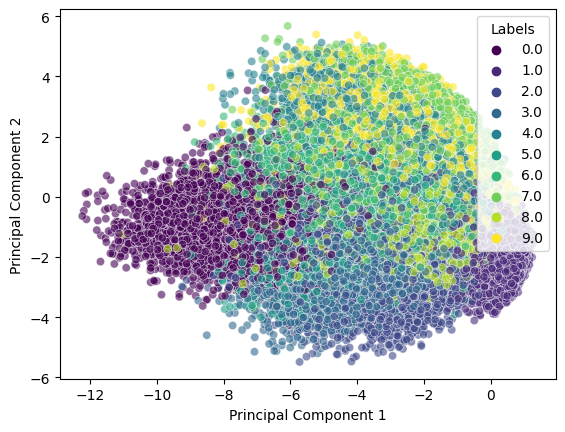

In [29]:
import seaborn as sns
fig1 = sns.scatterplot(data=finalpca, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.6, legend="full", palette='viridis')
sns.move_legend(fig1, "upper right")


# PCA with scikit learn

In [30]:
from sklearn.preprocessing import StandardScaler
trainnorm = StandardScaler().fit_transform(traindf)

In [31]:
trainnormdf = pd.DataFrame(trainnorm) 
trainnormdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 0 to 783
dtypes: float64(784)
memory usage: 358.9 MB


In [32]:
from sklearn import decomposition
pca = decomposition.PCA()

pca.n_components = 2
pca_digits = pca.fit_transform(trainnorm)
pca_digits.shape

(60000, 2)

In [33]:
pca_train_labels = np.vstack((pca_digits.T, trainlabels)).T
pca_result = pd.DataFrame(data=pca_train_labels, columns=("Principal Component 1", "Principal Component 2", "Labels"))

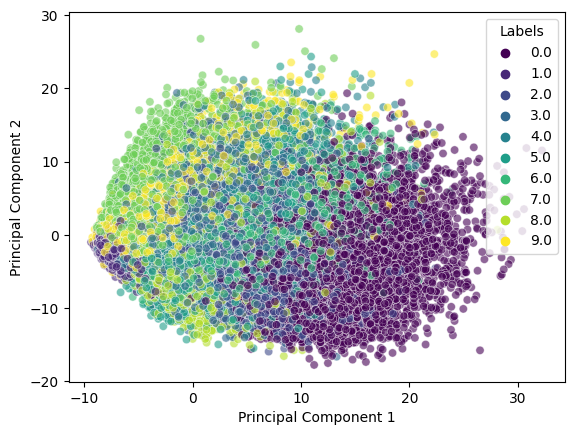

In [34]:
fig2 = sns.scatterplot(data=pca_result, x="Principal Component 1", y="Principal Component 2", 
                hue="Labels", alpha=0.6, legend="full", palette='viridis')
sns.move_legend(fig2, "upper right")

# MDS with two components

In [35]:
from sklearn.manifold import MDS
mds = MDS(n_components=2)
mds_digits = mds.fit_transform(trainnorm)
mds_digits.shape

MemoryError: Unable to allocate 26.8 GiB for an array with shape (60000, 60000) and data type float64